<a href="https://colab.research.google.com/github/PranaviBurrareddy/PranaviBurrareddy/blob/main/iidt_assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df=pd.read_csv('/content/Copy of Dataset - salesdata.csv')


In [6]:
# Preprocessing steps
# Drop any rows with missing values
df.dropna(inplace=True)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   OrderDate   43 non-null     object
 1   Region      43 non-null     object
 2   Manager     43 non-null     object
 3   SalesMan    43 non-null     object
 4   Item        43 non-null     object
 5   Units       43 non-null     int64 
 6   Unit_price  43 non-null     object
 7   Sale_amt    43 non-null     object
dtypes: int64(1), object(7)
memory usage: 2.8+ KB


In [13]:
df.isnull()

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [14]:
df.isnull().sum()

OrderDate     0
Region        0
Manager       0
SalesMan      0
Item          0
Units         0
Unit_price    0
Sale_amt      0
dtype: int64

In [15]:
df.isnull().sum().sum()

0

In [16]:
df.mean()

<ipython-input-16-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Units    49.325581
dtype: float64

In [17]:
df.median

<bound method NDFrame._add_numeric_operations.<locals>.median of      OrderDate   Region  Manager   SalesMan          Item  Units Unit_price  \
0   01-06-2018     East   Martha  Alexander    Television     95   1,198.00   
1      1-23-18  Central  Hermann     Shelli  Home Theater     50        500   
2   02-09-2018  Central  Hermann       Luis    Television     36   1,198.00   
3      2-26-18  Central  Timothy      David    Cell Phone     27        225   
4      3-15-18     West  Timothy    Stephen    Television     56   1,198.00   
5   04-01-2018     East   Martha  Alexander  Home Theater     60        500   
6      4-18-18  Central   Martha     Steven    Television     75   1,198.00   
7   05-05-2018  Central  Hermann       Luis    Television     90   1,198.00   
8      5-22-18     West  Douglas    Michael    Television     32   1,198.00   
9   06-08-2018     East   Martha  Alexander  Home Theater     60        500   
10     6-25-18  Central  Hermann      Sigal    Television     90   1,198.00   
11  07-12-2018     East   Martha      Diana  Home Theater     29        500   
12     7-29-18     East  Douglas      Karen  Home Theater     81        500   
13     8-15-18     East   Martha  Alexander    Television     35   1,198.00   
14  09-01-2018  Central  Douglas       John          Desk      2        125   
15     9-18-18     East   Martha  Alexander   Video Games     16       58.5   
16  10-05-2018  Central  Hermann      Sigal  Home Theater     28        500   
17    10-22-18     East   Martha  Alexander    Cell Phone     64        225   
18  11-08-2018     East  Douglas      Karen    Cell Phone     15        225   
19    11-25-18  Central  Hermann     Shelli   Video Games     96       58.5   
20  12-12-2018  Central  Douglas       John    Television     67   1,198.00   
21    12-29-18     East  Douglas      Karen   Video Games     74       58.5   
22     1-15-19  Central  Timothy      David  Home Theater     46        500   
23  02-01-2019  Central  Douglas       John  Home Theater     87        500   
24     2-18-19     East   Martha  Alexander  Home Theater      4        500   
25  03-07-2019     West  Timothy    Stephen  Home Theater      7        500   
26     3-24-19  Central  Hermann       Luis   Video Games     50       58.5   
27  04-10-2019  Central   Martha     Steven    Television     66   1,198.00   
28     4-27-19     East   Martha      Diana    Cell Phone     96        225   
29     5-14-19  Central  Timothy      David    Television     53   1,198.00   
30     5-31-19  Central  Timothy      David  Home Theater     80        500   
31     6-17-19  Central  Hermann     Shelli          Desk      5        125   
32  07-04-2019     East   Martha  Alexander   Video Games     62       58.5   
33     7-21-19  Central  Hermann      Sigal   Video Games     55       58.5   
34  08-07-2019  Central  Hermann     Shelli   Video Games     42       58.5   
35     8-24-19     West  Timothy    Stephen          Desk      3        125   
36  09-10-2019  Central  Timothy      David    Television      7   1,198.00   
37     9-27-19     West  Timothy    Stephen    Cell Phone     76        225   
38    10-14-19     West  Douglas    Michael  Home Theater     57        500   
39    10-31-19  Central   Martha     Steven    Television     14   1,198.00   
40    11-17-19  Central  Hermann       Luis  Home Theater     11        500   
41  12-04-2019  Central  Hermann       Luis  Home Theater     94        500   
42    12-21-19  Central    Marth     Steven  Home Theater     28        500   

       Sale_amt  
0   1,13,810.00  
1     25,000.00  
2     43,128.00  
3      6,075.00  
4     67,088.00  
5     30,000.00  
6     89,850.00  
7   1,07,820.00  
8     38,336.00  
9     30,000.00  
10  1,07,820.00  
11    14,500.00  
12    40,500.00  
13    41,930.00  
14          250  
15          936  
16    14,000.00  
17    14,400.00  
18     3,375.00  
19     5,616.00  
20    80,266.00  
21     4,329.00  
22    23,000.00  
23    43,500.00  
24     2

In [20]:
df.describe()

,Units
count,43.000000
mean,49.325581
std,30.078248
min,2.000000
25%,27.500000
50%,53.000000
75%,74.500000
max,96.000000


In [21]:
df.head(10)

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
0,01-06-2018,East,Martha,Alexander,Television,95,"1,198.00","1,13,810.00"
1,1-23-18,Central,Hermann,Shelli,Home Theater,50,500,"25,000.00"
2,02-09-2018,Central,Hermann,Luis,Television,36,"1,198.00","43,128.00"
3,2-26-18,Central,Timothy,David,Cell Phone,27,225,"6,075.00"
4,3-15-18,West,Timothy,Stephen,Television,56,"1,198.00","67,088.00"
5,04-01-2018,East,Martha,Alexander,Home Theater,60,500,"30,000.00"
6,4-18-18,Central,Martha,Steven,Television,75,"1,198.00","89,850.00"
7,05-05-2018,Central,Hermann,Luis,Television,90,"1,198.00","1,07,820.00"
8,5-22-18,West,Douglas,Michael,Television,32,"1,198.00","38,336.00"
9,06-08-2018,East,Martha,Alexander,Home Theater,60,500,"30,000.00"


In [29]:
df.columns


Index(['OrderDate', 'Region', 'Manager', 'SalesMan', 'Item', 'Units',
       'Unit_price', 'Sale_amt'],
      dtype='object')

In [30]:
df.std()

<ipython-input-30-ce97bb7eaef8>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


Units    30.078248
dtype: float64

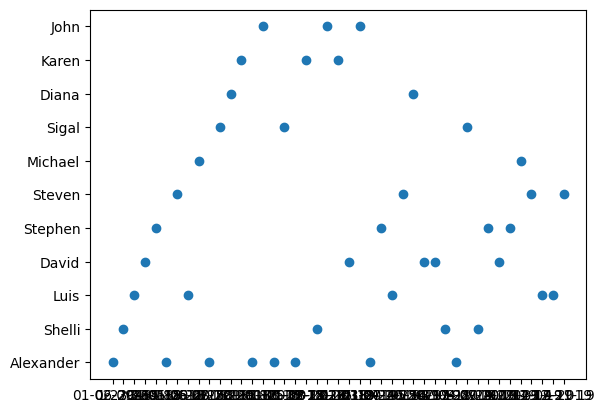

In [31]:
plt.scatter(df.OrderDate,df.SalesMan)

<BarContainer object of 43 artists>

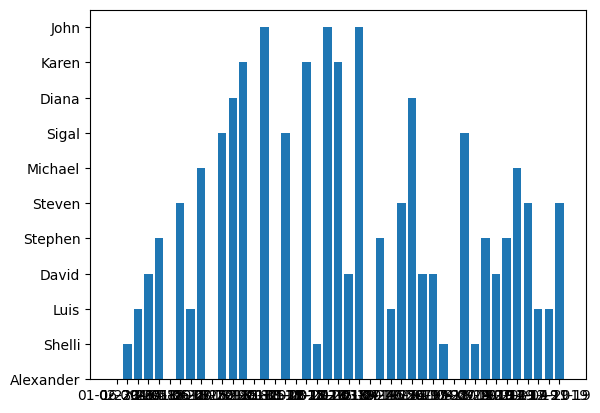

In [32]:
plt.bar(df.OrderDate,df.SalesMan)

In [34]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
x = df[['OrderDate']]
y = df['SalesMan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [65]:
X_train.head()

,OrderDate,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
3,2-26-18,Timothy,David,Cell Phone,27,225,"6,075.00"
6,4-18-18,Martha,Steven,Television,75,"1,198.00","89,850.00"
27,04-10-2019,Martha,Steven,Television,66,"1,198.00","79,068.00"
31,6-17-19,Hermann,Shelli,Desk,5,125,625
19,11-25-18,Hermann,Shelli,Video Games,96,58.5,"5,616.00"


In [66]:
# Importing the tarin test split package

from sklearn.model_selection import train_test_split

#Separating the Training and testing Data

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=0)

In [74]:
lm1=LinearRegression()
lm1.fit(X_train,y_train)
print(lm1.intercept_)
print(lm1.coef_)

ValueError: could not convert string to float: 'Central'

KeyError: "['Television'] not in index"

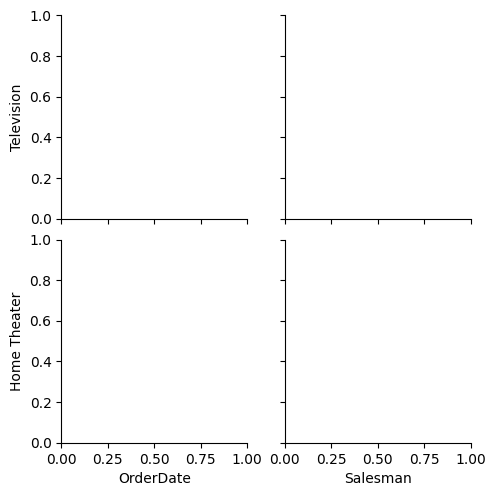

In [57]:
sns.pairplot(df,x_vars=['OrderDate','Salesman'], y_vars= ['Television','Home Theater'])
plt.xlabel('OrderDate')
plt.ylabel('SalesMan')
plt.title('Residuals vs Fitted values')
plt.show()


In [54]:

# Calculate evaluation metrics
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)



NameError: name 'X_test_scaled' is not defined

In [63]:
# Fit the linear regression model
from sklearn.linear_model import LinearRegression

x=df.drop('OrderDate', axis=1)

y=df['OrderDate']

lm1=LinearRegression()

lm1.fit(x,y)

print(lm1.intercept_)

print(lm1.coef_)


ValueError: could not convert string to float: 'East'

In [38]:
from sklearn.linear_model import LinearRegression
x=df.drop('SalesMan',axis=1)
y=df['Item']

In [39]:
x.head()

,OrderDate,Region,Manager,Item,Units,Unit_price,Sale_amt
0,01-06-2018,East,Martha,Television,95,"1,198.00","1,13,810.00"
1,1-23-18,Central,Hermann,Home Theater,50,500,"25,000.00"
2,02-09-2018,Central,Hermann,Television,36,"1,198.00","43,128.00"
3,2-26-18,Central,Timothy,Cell Phone,27,225,"6,075.00"
4,3-15-18,West,Timothy,Television,56,"1,198.00","67,088.00"


In [40]:
y.head()

0      Television
1    Home Theater
2      Television
3      Cell Phone
4      Television
Name: Item, dtype: object

NameError: name 'x_train' is not defined

In [59]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

NameError: name 'X_train_scaled' is not defined